In [39]:
from catanatron_experimental.machine_learning.players.minimax import AlphaBetaPlayer
from catanatron_core.catanatron.players.weighted_random import WeightedRandomPlayer
# from fortomm import PlayerE
from fortomm import FooPlayer
from catanatron import Game, RandomPlayer, Color
from collections import Counter
from catanatron import Player
from catanatron.models.actions import ActionType
import random
from catanatron.state_functions import player_key

initaiation of the GP #2 approach 

In [40]:
class GP(Player):
    
    def __init__(self,color):
        super().__init__(color)
        self.INITIAL_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: random.randint(100,10000),
            ActionType.BUILD_SETTLEMENT: random.randint(100,10000),
            ActionType.BUY_DEVELOPMENT_CARD: random.randint(100,10000),
            ActionType.BUILD_ROAD: random.randint(100,10000)
        }
        
        self.MID_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: random.randint(100,10000),
            ActionType.BUILD_SETTLEMENT: random.randint(100,10000),
            ActionType.BUY_DEVELOPMENT_CARD: random.randint(100,10000),
            ActionType.BUILD_ROAD: random.randint(100,10000)
        }
        
        
        self.LATE_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: random.randint(100,10000),
            ActionType.BUILD_SETTLEMENT: random.randint(100,10000),
            ActionType.BUY_DEVELOPMENT_CARD: random.randint(100,10000),
            ActionType.BUILD_ROAD: random.randint(100,10000)
        }
        
    def get_VP(self, game):
        """Returns the current Victory Points of the Player"""
        key = player_key(game.state, self.color)
        return game.state.player_state[f"{key}_ACTUAL_VICTORY_POINTS"]
    
    def decide(self, game, playable_actions):
        """Should return one of the playable_actions.

        Args:
            game (Game): complete game state. read-only.
            playable_actions (Iterable[Action]): options to choose from
        Return:
            action (Action): Chosen element of playable_actions
        """

        
        bloated_actions = []
        for action in playable_actions:
            if self.get_VP(game) < 5:
                weight = self.INITIAL_WEIGHTS_BY_ACTION_TYPE.get(action.action_type, 1)
                bloated_actions.extend([action] * weight)
            elif self.get_VP(game) > 4 and self.get_VP(game) < 8:
                weight = self.MID_WEIGHTS_BY_ACTION_TYPE.get(action.action_type, 1)
                bloated_actions.extend([action] * weight)
            elif self.get_VP(game) > 7:
                weight = self.LATE_WEIGHTS_BY_ACTION_TYPE.get(action.action_type, 1)
                bloated_actions.extend([action] * weight)
            
        index = random.randrange(0, len(bloated_actions))
        if self.analysis:
            self.analysis(bloated_actions[index], self.color)
        return bloated_actions[index]
    
    def get_weights(self):
        """Returns List of 12 Weights in order [City,Settlement,Dev Card,Road],
        The first 4 correspond to weights in Early Game (VP<5),
        The next 4 correspond to weights in Mid Game (4<VP<8),
        The final 4 correspond to weights in Late Game (VP>7),
        """
        weights = [self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_CITY],self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_SETTLEMENT],self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUY_DEVELOPMENT_CARD],self.INITIAL_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_ROAD],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_CITY],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_SETTLEMENT],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUY_DEVELOPMENT_CARD],self.MID_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_ROAD],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_CITY],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_SETTLEMENT],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUY_DEVELOPMENT_CARD],self.LATE_WEIGHTS_BY_ACTION_TYPE[ActionType.BUILD_ROAD]]
        return weights
    
    def get_color(self):
        """Returns the Color of the Player"""
        return self.color
    
    def set_color(self,color):
        """Sets the Color of the Player
        
        Args:
            color: color to set for the player
        """
        self.color = color
    
    def set_weights(self,weights):
        """Sets the Weights that skew the Players Actions in Game
        
        Args:
            weights: list of weights (same format as seen in self.get_weights())
        """
        
        self.INITIAL_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: weights[0],
            ActionType.BUILD_SETTLEMENT: weights[1],
            ActionType.BUY_DEVELOPMENT_CARD: weights[2],
            ActionType.BUILD_ROAD: weights[3]
        }
        
        self.MID_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: weights[4],
            ActionType.BUILD_SETTLEMENT: weights[5],
            ActionType.BUY_DEVELOPMENT_CARD: weights[6],
            ActionType.BUILD_ROAD: weights[7]
        }
        
        
        self.LATE_WEIGHTS_BY_ACTION_TYPE = {
            ActionType.BUILD_CITY: weights[8],
            ActionType.BUILD_SETTLEMENT: weights[9],
            ActionType.BUY_DEVELOPMENT_CARD: weights[10],
            ActionType.BUILD_ROAD: weights[11]
        }
    

Players for the game

In [52]:
players = [
    # AlphaBetaPlayer(Color.BLUE),
    GP(Color.BLUE),
    # WeightedRandomPlayer(Color.ORANGE),
    # WeightedRandomPlayer(Color.RED),
    FooPlayer(Color.WHITE),
]

playerNames = {
    # Color.BLUE: "AlphaBeta",
    Color.BLUE: "GP Approach2",
    # Color.ORANGE: "WeightedRandom 1",
    # Color.RED: "WeightedRandom 2",
    Color.WHITE: "GP Approach1",
}

{<ActionType.BUILD_CITY: 'BUILD_CITY'>: 8826, <ActionType.BUILD_SETTLEMENT: 'BUILD_SETTLEMENT'>: 1347, <ActionType.BUY_DEVELOPMENT_CARD: 'BUY_DEVELOPMENT_CARD'>: 91, <ActionType.BUILD_ROAD: 'BUILD_ROAD'>: 8016}


In [42]:
# players[0].set_weights([6217, 9865, 2767, 111, 7019, 8607, 1596, 393, 9135, 3414, 7137, 219])

Number of game to be played

In [43]:
NumberOfGames = 100

In [44]:
import time
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from copy import deepcopy

In [45]:



class Analysis:
    def __init__(self, playerNames={}):

        self.ActionsOfPlayers = defaultdict(list)
        self.GamesAndPlayers = {}
        self.game = 0
        self.playerNames = playerNames

    def set_game(self, game_number):
        self.game = game_number
        
    def end_game(self):
        for i in self.ActionsOfPlayers:
            self.GamesAndPlayers[self.game] = deepcopy(self.ActionsOfPlayers)

    def record_action(self, action_name, Player_id):

        self.ActionsOfPlayers[Player_id].append(action_name.action_type)


    def generate_plot(self):
        actions_count = {}
        for i in self.ActionsOfPlayers:
            actions_count[i] = Counter(self.ActionsOfPlayers[i])

        temp_count = sorted(list(actions_count.keys()), key=lambda x: str(x))
        if len(temp_count) == 4:
            fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharey=True)
            fig.suptitle('Actions of Players')
            for i in range(4):
                ax = axs[i // 2][i % 2]
                x = []
                y = []
                for k, v in actions_count[temp_count[i]].items():
                    if str(k)[11:] not in ['END_TURN', 'ROLL']:
                    # if str(k)[11:] in ['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD']:
                        x.append(str(k)[11:])
                        y.append(int(v))
                
                print(x, y)
                ax.bar(x, y)

                ax.set_title('Player {}'.format(self.playerNames[temp_count[i]]))
                ax.set_xlabel('Actions')
                ax.set_ylabel('Count')
                ax.set_xticklabels(x, rotation = 80)
                
        elif len(temp_count) == 3:
            fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6), sharey=True)
            fig.suptitle('Actions of Players')

            for i in range(3):
                ax = axs[i]
                x = []
                y = []
                for k, v in actions_count[temp_count[i]].items():
                    if str(k)[11:] not in ['END_TURN', 'ROLL']:
                    # if str(k)[11:] in ['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD']:
                    # if True:  
                        x.append(str(k)[11:])
                        y.append(int(v))
                
                print(x, y)
                ax.bar(x, y, color=['blue', 'red', 'green', 'orange'])

                ax.set_title('Player {}'.format(self.playerNames[temp_count[i]]))
                ax.set_xlabel('Actions')
                ax.set_ylabel('Count')
                ax.set_xticklabels(x, rotation = 80)  
        elif len(temp_count) == 2:
            fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
            fig.suptitle('Actions of Players')

            for i in range(2):
                ax = axs[i]
                x = []
                y = []
                for k, v in sorted(actions_count[temp_count[i]].items(), key=lambda x: str(x[0])):
                    if str(k)[11:] not in ['END_TURN', 'ROLL']:
                    # if str(k)[11:] in ['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD']:
                        
                        x.append(str(k)[11:])
                        y.append(int(v))

                print(x, y)
                ax.bar(x, y, color=['blue', 'red', 'green', 'orange'])

                ax.set_title('Player {}'.format(self.playerNames[temp_count[i]]))
                ax.set_xlabel('Actions')
                ax.set_ylabel('Count')
                ax.set_xticklabels(x, rotation = 80)
        plt.tight_layout()
        plt.show()



                

initilization of the Analysis class

In [46]:
A = Analysis(playerNames)

In [47]:
for i in players:
    i.analysis = A.record_action

Plays the games `Number of times` times and returns the win rate of the player with the given `player_id`.

In [48]:
victory = []

# running the games for the current generation
for games in range(NumberOfGames):
    game = Game(players)
    val = game.play()
    victory.append(val)
    print(games)

c = dict(Counter(victory))
for key in c:
    c[key] = int(c[key] / NumberOfGames * 100)
# A.generate_plot()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [49]:
for i in c:
    if not i:
        continue
    print("{} : {}".format(playerNames[i], c[i]))

GP Approach2 : 55
GP Approach1 : 45


Prints out the score for best scores

In [50]:
c

{<Color.BLUE: 'BLUE'>: 55, <Color.WHITE: 'WHITE'>: 45}

Generate the plot for a 1v1 game

['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD', 'DISCARD', 'MARITIME_TRADE', 'MOVE_ROBBER', 'PLAY_KNIGHT_CARD', 'PLAY_MONOPOLY', 'PLAY_ROAD_BUILDING', 'PLAY_YEAR_OF_PLENTY'] [78, 1135, 301, 839, 201, 3287, 3395, 473, 52, 69, 57]
['BUILD_CITY', 'BUILD_ROAD', 'BUILD_SETTLEMENT', 'BUY_DEVELOPMENT_CARD', 'DISCARD', 'MARITIME_TRADE', 'MOVE_ROBBER', 'PLAY_KNIGHT_CARD', 'PLAY_MONOPOLY', 'PLAY_ROAD_BUILDING', 'PLAY_YEAR_OF_PLENTY'] [70, 1158, 306, 695, 173, 2760, 3087, 370, 62, 32, 58]


/var/folders/yx/26cx6f8n0yz15r1qq9nt8m2c0000gr/T/ipykernel_38956/430402508.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)
/var/folders/yx/26cx6f8n0yz15r1qq9nt8m2c0000gr/T/ipykernel_38956/430402508.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 80)


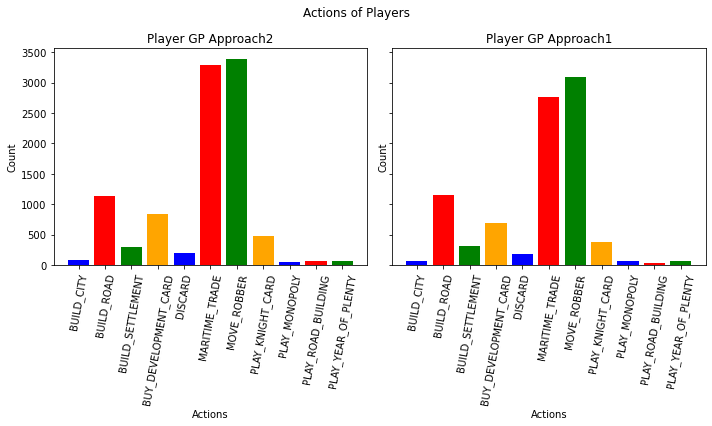

In [51]:
A.generate_plot()